# <div style="text-align:center">Handout: "Classical and Quantum Harmonic Oscillator"</div>

## <span style="color:blue">1. Theoretical Background</span>

### 1.1. Classical harmonic oscillator

Classical Harmonic Oscillators are bodies which experience a restoring force anytime they experience a displacement away from their equilibrium position.

For example, a mass connected to a wall by a spring will undergo harmonic oscillation if you perturb the body.

<img src="spring-oscillation-thumbnail.png" alt="Harmonic oscillator" style="max-width: 400px;"/>

To describe vibrations or the harmonic oscillator using classical mechanics, consider a mass $m$ connected to a wall by a sping. The force acting on the mass is given by the Hooke's law $F = -kx$, where $k$ is a force constant and $x$ is a displacement of the mass from its equilibrium position (i.e., when $x = 0$ and $F = 0$). The classical equation of motion for the harmonic oscillator can be written as:

\begin{align}
m \frac{d^{2}x}{dt^{2}} = -kx
\end{align}

The solution of classical equation of motion for the displacement as a function of time has the form:

\begin{align}
x(t) = A \cos(\omega t)
\end{align}

where $A = x(0)$ is the amplitude of vibration and $\omega = \sqrt{\frac{k}{m}}$ is the angular frequency measured in radians per second (rad/s). The angular frequency is related to the linear frequency $\nu = \frac{\omega}{2\pi}$ that is measured in Hertz (Hz or s$^{-1}$).

Using the solution of the equation of motion, we can determine kinetic and potential energy of the harmonic oscillator as functions of time:

* **Kinetic energy**: 
\begin{align}
K(t) = \frac{m}{2} \omega^{2} A^{2} \sin^{2} {\omega t}
\end{align}

* **Potential energy**: 
\begin{align}
V(t) = \frac{k}{2} A^{2} \cos^{2} {\omega t}
\end{align}

* **Total energy**: 
\begin{align}
E = K(t) + V(t) = \frac{k}{2} A^{2}
\end{align}

Note that the total energy is constant as required by the energy conservation law.

***
####  Example 1: Demonstrate conservation of the total energy of the classical harmonic oscaillator at any given time

First, we demonstrate this analytically by combining kinetic and potential energy of harmonic oscillator as a function of time:

\begin{align}
E &= K(t) + V(t) \\
&= \frac{m}{2} \omega^{2} A^{2} \sin^{2} {\omega t} + \frac{k}{2} A^{2} \cos^{2} {\omega t}
\end{align}

Using the fact that $m\omega^2 = k$, the above equation can be simplified as:
\begin{align}
E &= \frac{k}{2} A^{2} \sin^{2}{\omega t} + \frac{k}{2} A^{2} \cos^{2}{\omega t} \\
&= \frac{k}{2} A^{2} (\sin^{2}{\omega t} + \cos^{2}{\omega t}) \\
&= \frac{k}{2} A^{2}
\end{align}

Thus, we obtain that the total energy is independent of time. 

We now demonstrate this numerically by plotting kinetic, potential, and total energy as a function of time.

To do that, we define parameters of our harmonic oscillator model:

In [ ]:
force_const = 0.01   # Force constant (N/m)
mass = 2.000         # Mass (kg)
amplitude = 1.500    # Amplitude (m)
max_time = 100       # Time to observe (s)
n_points = 100       # Number of points on each curve

We then define a function that calculates kinetic, potential, and total energy for a number of points:

In [ ]:
# Import Python modules
import numpy as np
import matplotlib.pyplot as plt

def energy(k,m,A,t):
    omega = np.sqrt(k/m)
    kin_en = k*(A**2)*0.5*((np.sin(omega*t))**2) # Kinetic energy term
    pot_en = k*(A**2)*0.5*((np.cos(omega*t))**2) # Potential energy term
    tot_en =  kin_en + pot_en                    # Total energy term
    return kin_en, pot_en, tot_en
    

Finally, we plot each energy contribution as a function of time:

In [ ]:
## Plotting each energies.

t_points = np.linspace(0,max_time,n_points)
kin_en, pot_en, tot_en = energy(force_const, mass, amplitude, t_points)

plt.figure(figsize=(10,4))
plt.plot(t_points, kin_en, label = "Kinetic Energy")
plt.plot(t_points, pot_en, label = "Potential Energy")
plt.plot(t_points, tot_en, label = "Total Energy of the system")
plt.xlabel("Time in seconds", fontsize=15)
plt.ylabel("Energy in Joules", fontsize=15)
plt.legend(loc = 'lower right')
plt.title("Plots of Kinetic, potential and total energy", fontsize=20)
plt.tight_layout()
plt.grid()

We see that the total energy is indeed constant in time.
***

### 1.2. Classical harmonic oscillator of a two-body system

Classical harmonic oscillator model can be used to describe classical vibrations of two masses connected by a spring. Such classical model can be used to describe vibrations of a diatomic molecule. 

<img src="two_body.jpeg" alt="Two-body harmonic oscillator" style="max-width: 200px;"/>

Similar to the one-body example in Section 1.1, we can set up equations of motion for displacement of each mass:

\begin{align}
\frac{d^{2} x_1}{dt^2} &= \frac{k}{m_1} (x_{2} - x_{1} - l_{0}) \\
\frac{d^{2} x_2}{dt^2} &= - \frac{k}{m_2}(x_{2} - x_{1} - l_{0})
\end{align}

Here, $x_{1}$ and $x_{2}$ are displacements of masses $m_1$ and $m_2$, and $l_{0}$ is an undistorted spring length. Solution of this two-body problem reduces to the solution of the one-body problem described previously:

\begin{align}
\mu \frac{d^{2}x}{dt^2} = -kx
\end{align}

where $x = x_2 - x_1 - l_0$ is the change in the distance between two masses relative to their equilibrium position (i.e., when $x = 0$ and $x_2 - x_1 = l_0$) and $\mu$ is the reduced mass given by:

\begin{align}
\mu = \frac{m_{1} m_{2}}{m_{1} + m_{2}}
\end{align}

For this two-body system, the angular frequency is given by 

\begin{align}
\omega = \sqrt{\frac{k}{\mu}}
\end{align}



***
####  Example 2: Using equations of motion of the classical harmonic oscillator, plot distortion of a diatomic molecule's bond length as a function of time given the experimental vibrational frequency (in cm$^{-1}$) and atomic masses (in amu).

We first define parameters of the molecule:

In [1]:
## List of parameter you can play with.

nu_inv_cm = 4401.0    # Fundamental vibrational frequency (in cm^-1)
m_1 = 1.0             # Mass of atom 1 (amu)
m_2 = 1.0             # Mass of atom 2 (amu)

Amp =  (10**(-11))    # Amplitude of classical vibrations (m).

time  = 0.6*10**(-13) # Time to observe vibrations (s)
t_step = 10**(-16)    # Time step (s)


Using these parameters and classical equations of motion we can plot the bond length distortion as a function of time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
from matplotlib import animation, rc
from IPython.display import HTML

## Introduce important constants here
speed_of_light = scipy.constants.speed_of_light # Speed of light
proton_m = scipy.constants.proton_mass # Proton rest mass
planck_const = scipy.constants.Planck

## Unit conversion of reduced mass, frequencies and force constants into SI units,
nu_inv_m = nu_inv_cm * 100
red_mass = (m_1*m_2)/(m_1 + m_2)
red_mass_kg = red_mass * proton_m
k = red_mass_kg * (2.0 * np.pi * speed_of_light * nu_inv_m)**2

## Obtain omega and written plot details.

omega = np.sqrt(k/red_mass_kg)
fig = plt.figure() 
ax = plt.axes(xlim=(0.00, time), ylim=(-1.200 * Amp, 1.200 * Amp)) 
ax.grid()
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 
def animate(i): 
    # t is a parameter 
    t = t_step*i 

# x, y values to be plotted 
    x = t
    y = Amp * np.cos(omega * t)

# appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Classical Harmonic Oscillator motion of Molecules') 
plt.xlabel('Time in seconds')
plt.ylabel("Displcement from the equilibrium Bond distance")

n_frames = int(time/t_step)
anim = animation.FuncAnimation( fig, animate, init_func = init, frames = n_frames, interval=20, blit = False)
HTML(anim.to_html5_video())

***

### 1.3. Quantum harmonic oscillator

Now, let's describe vibrations of the harmonic oscillator using quantum mechanics. In this model, a particle is vibrating in a well described by a harmonic potential. Thus, the harmonic oscillator Hamiltonian will have the form:

\begin{align}
\hat{H} = \frac{\hat{p}_x^2}{2\mu} + V(x) = - \frac{\hbar^2}{2\mu} \frac{\mathrm{d}^2}{\mathrm{d}x^2} + \frac{k}{2}x^2
\end{align}

The Schrödinger equation for the harmonic oscillator takes the form:

\begin{align}
\hat{H} \Psi_n(x) = E_n \Psi_n(x)
\end{align}

\begin{align}
- \frac{\hbar^2}{2\mu} \frac{\mathrm{d}^2}{\mathrm{d}x^2}\Psi_n(x) + \frac{k}{2}x^2\Psi_n(x) = E_n \Psi_n(x)
\end{align}

This equation can be solved analytically, but the solution is more complicated than solving the Schrödinger equation for the particle in a box.

### 1.4. Energy levels of quantum harmonic oscillator

The energy levels of quantum harmonic oscillator are given by the following equation:

\begin{align}
E_n = \left( n + \frac{1}{2} \right) \hbar \omega = \left( n + \frac{1}{2} \right) h \nu
\end{align}

where $\omega$ is the angular frequency and $\nu = \frac{\omega}{2\pi}$ is the linear frequency. The angular frequency is related to the Hooke's constand $k$ and the reduced mass $\mu$ as follows:

\begin{align}
\omega = \sqrt{\frac{k}{\mu}}
\end{align}

The energy spectrum of harmonic oscillator has several important properties:

* **Energies are quantized**. The quantum number $n$ appearing in the energy expression can only take integer vales $n = 0, 1, 2, 3, \ldots$

* **Energy levels are equally-spaced**. The spacing between the energy levels is equal to $\hbar \omega$. 

* **In the ground level ($n=0$), the energy is not zero**. This energy is known as *zero-point energy* (ZPE). For the quantum harmonic oscillator, ZPE is given by:

\begin{align}
E_0 = \frac{\hbar\omega}{2}
\end{align}

***
####  Example 3: Given a fundamental vibrational frequency (in cm$^{-1}$) and atomic masses (in amu) of a diatomic molecule, plot its harmonic potential and several lowest vibrational energy levels.

First, let's set up parameters of our problem by specifying the fundamental vibrational frequency $\tilde{\nu}$ (in cm$^{-1}$), atomic masses (in amu), and the number of energy levels we will plot:

In [6]:
# Parameters for H2
nu_inv_cm = 4401.0 # Fundamental vibrational frequency (in cm^-1)
m_1 = 1.0 # Mass of atom 1 (amu)
m_2 = 1.0 # Mass of atom 2 (amu)
#nu_inv_cm = 323.0 # Fundamental vibrational frequency (in cm^-1)
#m_1 = 79 # Mass of atom 1 (amu)
#m_2 = 79 # Mass of atom 2 (amu)
n_levels = 4
n_points = 100 # Number of points used for the plot

Now, calculate reduced mass ($\mu$, kg) and force constant of the molecule ($k$, N m$^{-1}$):

In [7]:
# Import Python modules
import numpy as np
import scipy.constants
import matplotlib.pyplot as plt

if n_levels < 2:
    raise Exception("Number of levels must be greater than 1")

# Physical constants
speed_of_light = scipy.constants.speed_of_light # Speed of light
proton_m = scipy.constants.proton_mass # Proton rest mass
planck_const = scipy.constants.Planck

# Convert vibrational frequency in SI units (m^1)
nu_inv_m = nu_inv_cm * 100

red_mass = m_1 * m_2 / (m_1 + m_2) # Reduced mass in amu
red_mass *= proton_m # Reduced mass in kg

force_const = red_mass * (2.0 * np.pi * speed_of_light * nu_inv_m)**2 # Force constant N m^-1

print ("Reduced mass: ", red_mass, "(kg)")
print ("Force constant:", force_const, "(N m^-1)")

Reduced mass:  8.36310949e-28 (kg)
Force constant: 574.7403158523122 (N m^-1)


Calculate the values of energies (in J) for each energy level:

In [8]:
nu = nu_inv_m * speed_of_light

energy_levels = np.zeros(n_levels)

for v in range(n_levels):
    energy_levels[v] = planck_const * nu * (v + 0.5)

Plot the harmonic potential and energy levels

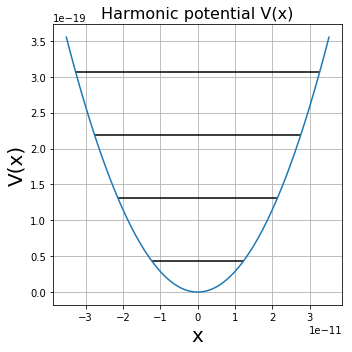

In [9]:
# Define function to calculate harmonic potential for force constant k and position x
def harmonic_potential(k,x):
    return 0.5 * k * x**2

# Define x points
x_max = np.sqrt(2.0 * energy_levels / force_const)
x_max = x_max[-1] + (x_max[-1] - x_max[-2]) / 2
x_points = np.linspace(-x_max, x_max ,n_points)

# Evaluate potential at each x
V = harmonic_potential(force_const, x_points)

# Set up graph and plot
plt.figure(figsize=(10,10))
for e in energy_levels:
    e_x_max = np.sqrt(2.0 * e / force_const)
    plt.hlines(e, -e_x_max, e_x_max, colors="black")

plt.plot(x_points, V)
plt.xlabel("x", fontsize=20)
plt.ylabel("V(x)", fontsize=20)
plt.title("Harmonic potential V(x)", fontsize=16)
plt.tight_layout()
plt.grid()

***

### 1.5. Quantum harmonic oscillator wavefunctions

The quantum harmonic oscillator wavefunctions have a general form:

\begin{align}
\Psi_n(x) = N_n H_n (\sqrt{\alpha}x)e^{-\alpha x^2 / 2}
\end{align}

where $N_n$ is a normalization constant
\begin{align}
N_n = \frac{1}{\sqrt{2^n \,n!}}\left( \frac{\alpha}{\pi} \right)^{1/4}
\end{align}

$\alpha$ is a constant that depends on the Hooke's constant $k$ and reduced mass $\mu$

\begin{align}
\alpha = \sqrt{\frac{k\mu}{\hbar^2}}
\end{align}

and functions $H_n (\sqrt{\alpha}x)$ are known as Hermite polynomials. The Hermite polynomials can be generated for different quantum numbers $n$ using a recursion relation

\begin{align}
H_{n+1}(y) = 2y H_n(y) - 2nH_{n-1}(y)
\end{align}

by starting with the zeroth-order and first-order Hermite polynomials: $H_0(y) = 1$ and $H_1(y) = 2y$.

The harmonic oscillator wavefunctions have several notable properties:

* **Wavefunction $\Psi_n(x)$ of the $n$-th energy level has $n$ nodes**. Nodes are points when $\Psi_n(x)=0$ and changes sign. The ground-state wavefunction $\Psi_0(x)$ is no nodes. Each successive wavefunction has one more node, which increases its "waviness". These nodes are necessary to ensure that all wavefunctions are orthogonal to each other.

* **Each wavefunction $\Psi_n(x)$ is either an even or odd function**. Harmonic oscillator wavefunctions $\Psi_n(x)$ alternate between being odd or even with increasing (or decreasing) quantum number $n$. This property is very important because it significantly simplifies calculation of averages of quantum-mechanical operators (e.g., average position or momentum).

* **For each state, wavefunction and probability density are non-zero beyond the classical turning points**. This property is a manifistation of quantum-mechanical tunneling.





***
#### Example 4. Given a fundamental vibrational frequency (in cm$^{-1}$) and atomic masses (in amu) of a diatomic molecule, plot harmonic vibrational wavefunctions and probability densities for several lowest vibrational energy levels.

Similar to Example 3, we first set up parameters of our problem by specifying the fundamental vibrational frequency $\tilde{\nu}$ (in cm$^{-1}$), atomic masses (in amu), and the number of vibrational states, which wavefunctions we will plot:

In [83]:
# Parameters for H2
nu_inv_cm = 4401.0 # Fundamental vibrational frequency (in cm^-1)
m_1 = 1.0 # Mass of atom 1 (amu)
m_2 = 1.0 # Mass of atom 2 (amu)
#nu_inv_cm = 323.0 # Fundamental vibrational frequency (in cm^-1)
#m_1 = 79 # Mass of atom 1 (amu)
#m_2 = 79 # Mass of atom 2 (amu)
n_levels = 5
n_points = 100 # Number of points used for the plot

Once parameters are set up, let us calculate harmonic potential and harmonic oscillator energy levels. This step closely follows procedure that we used in Example X:

In [84]:
# Import Python modules
import numpy as np
import scipy.constants
import scipy.special
import matplotlib.pyplot as plt

if n_levels < 2:
    raise Exception("Number of levels must be greater than 1")

# Physical constants
speed_of_light = scipy.constants.speed_of_light # Speed of light
proton_m = scipy.constants.proton_mass # Proton rest mass
planck_const = scipy.constants.Planck
hbar = scipy.constants.hbar

# Convert vibrational frequency in SI units (m^1)
nu_inv_m = nu_inv_cm * 100

red_mass = m_1 * m_2 / (m_1 + m_2) # Reduced mass in amu
red_mass *= proton_m # Reduced mass in kg

force_const = red_mass * (2.0 * np.pi * speed_of_light * nu_inv_m)**2 # Force constant N m^-1

nu = nu_inv_m * speed_of_light

energy_levels = np.zeros(n_levels)

for v in range(n_levels):
    energy_levels[v] = planck_const * nu * (v + 0.5)
    
# Define function to calculate harmonic potential for force constant k and position x
def harmonic_potential(k,x):
    return 0.5 * k * x**2

# Define x points
x_max = np.sqrt(2.0 * energy_levels / force_const)
x_max = x_max[-1] + (x_max[-1] - x_max[-2]) 
x_points = np.linspace(-x_max, x_max ,n_points)

# Evaluate potential at each x
V = harmonic_potential(force_const, x_points)

Now, we are ready to calculate harmonic oscillator wavefunctions for each electronic state:

In [87]:
# Calculate alpha constant
alpha = np.sqrt(force_const * red_mass / (hbar)**2)

# Calculate wavefunctions for each energy level
wfns = np.zeros((n_levels, n_points))

for v in range(n_levels):
    norm_prefactor = (alpha/np.pi)**(0.25) / (np.sqrt((2.0**v) * np.math.factorial(v)))
    x_scaled = np.sqrt(alpha) * x_points
    wfns[v] = norm_prefactor * np.exp(-(x_scaled**2) / 2.0) * scipy.special.eval_hermite(v, x_scaled)
    

Finally, let's plot wavefunctions on top of potential energy curve:

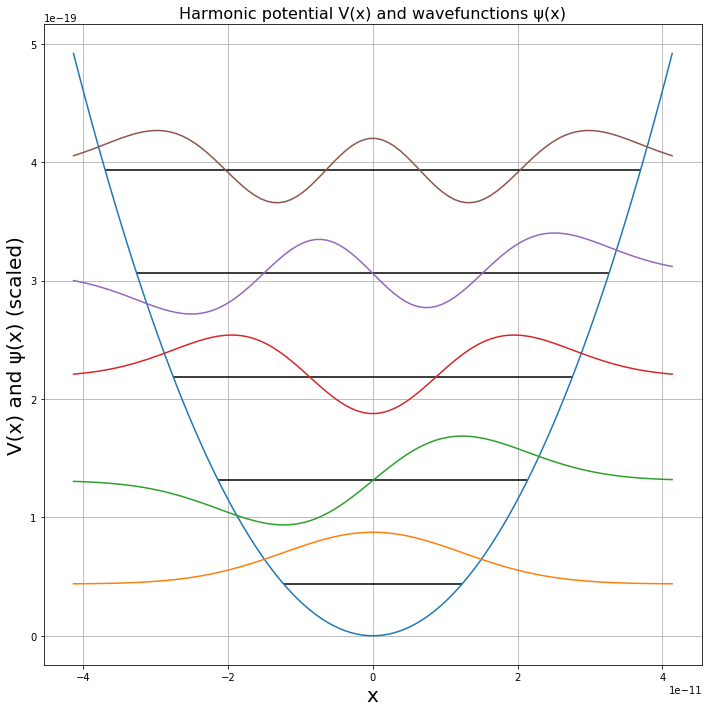

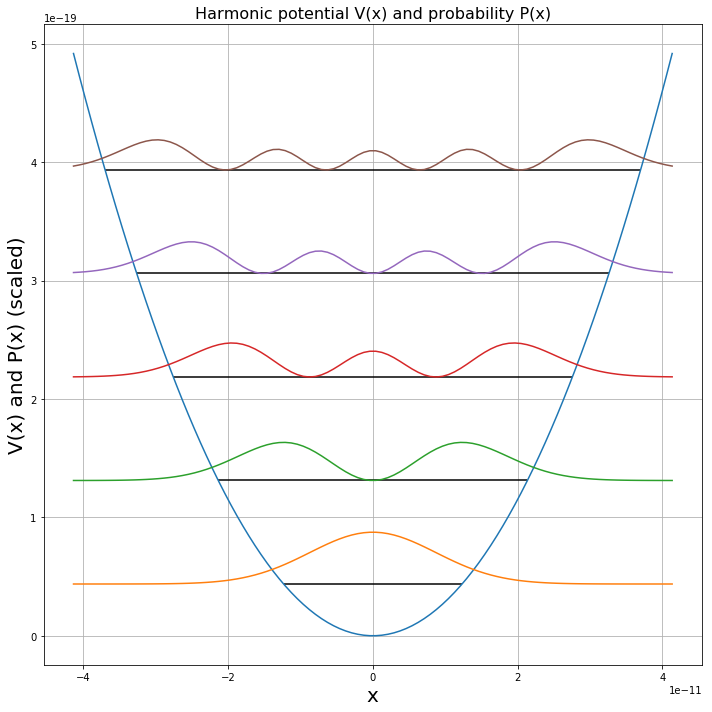

In [13]:
# Determine energy spacing
de = energy_levels[1] - energy_levels[0]

# Determine max value of wavefunction in the ground state
max_wfn = np.amax(wfns[0])
scale = de / (2 * max_wfn)

# Set up graph and plot
plt.figure(figsize=(10,10))
for e in energy_levels:
    e_x_max = np.sqrt(2.0 * e / force_const)
    plt.hlines(e, -e_x_max, e_x_max, colors="black")

plt.plot(x_points, V)
plt.xlabel("x", fontsize=20)
plt.ylabel("V(x) and ψ(x) (scaled)", fontsize=20)
plt.title("Harmonic potential V(x) and wavefunctions ψ(x)", fontsize=16)
plt.tight_layout()
plt.grid()
    
for v in range(n_levels):
    wfn = scale * wfns[v] + energy_levels[v]
    plt.plot(x_points, wfn)
    
# Plot probability density for each energy level
max_p = np.amax(wfns[0] * wfns[0])
scale_p = de / (2 * max_p)

plt.figure(figsize=(10,10))
for e in energy_levels:
    e_x_max = np.sqrt(2.0 * e / force_const)
    plt.hlines(e, -e_x_max, e_x_max, colors="black")

plt.plot(x_points, V)
plt.xlabel("x", fontsize=20)
plt.ylabel("V(x) and P(x) (scaled)", fontsize=20)
plt.title("Harmonic potential V(x) and probability P(x)", fontsize=16)
plt.tight_layout()
plt.grid()
    
for v in range(n_levels):
    wfn = scale_p * wfns[v] * wfns[v] + energy_levels[v]
    plt.plot(x_points, wfn)

***

## <span style="color:blue">2. Exercises</span>

### 2.1. Question 1.

Find the Probability of finding the Hydrogen Molecule beyond its classical turning points for n = 1, 2, 3 and 4.
This is called the tunneling probability. Show that the tunneling probability decreases as we increase n.

Given:
Mass of Hydrogen atom = 1.00 amu.

$\overline{\nu}$ = 4401.0 $cm^{-1}$



#### Solution:

In [72]:
# Parameters for the given molecule. (H2 here)
nu_inv_cm = 4401.0 # Fundamental vibrational frequency (in cm^-1)
m_1 = 1.0 # Mass of atom 1 (amu)
m_2 = 1.0 # Mass of atom 2 (amu)
n_level = 2
n_points = 200

In [88]:
# Perform Initial calculations from the parameters.
# Import Python modules
import numpy as np
import scipy.constants
import scipy.special


# Physical constants
speed_of_light = scipy.constants.speed_of_light # Speed of light
proton_m = scipy.constants.proton_mass # Proton rest mass
planck_const = scipy.constants.Planck
hbar = scipy.constants.hbar

# Convert vibrational frequency in SI units (m^1)
nu_inv_m = nu_inv_cm * 100

red_mass = m_1 * m_2 / (m_1 + m_2) # Reduced mass in amu
red_mass *= proton_m # Reduced mass in kg

force_const = red_mass * (2.0 * np.pi * speed_of_light * nu_inv_m)**2 # Force constant N m^-1

nu = nu_inv_m * speed_of_light

In [109]:
# Find wavefunctions for n values
# Calculate alpha constant
alpha = np.sqrt(force_const * red_mass / (hbar)**2)

# Calculate wavefunctions for each energy level
wfns = np.zeros(n_points)

#Form wavefunction
def integrand(x, alpha, n_level):
    y = (np.sqrt(alpha))*x
    norm_prefactor = (alpha/np.pi)**(0.25) / (np.sqrt((2.0**n_level) * np.math.factorial(n_level)))
#x_scaled = np.sqrt(alpha) * x_points
    I = norm_prefactor * (np.exp(-(y**2) / 2.0)) *( scipy.special.eval_hermite( n_level, y))
    I = I*I

    return I

# Calculate Energy for that n_value

energy = planck_const * nu * (n_value + 0.5)

In [110]:
# Calculate turning points
e_x_max = np.sqrt(2.0 * energy / force_const)
e_x_min = - np.sqrt(2.0 * energy / force_const)

In [124]:
# Calculate Tunneling Probability for given quantum number n of the 
# Quantum Harmonic Oscillator.

import scipy.integrate as integrate

#i = scipy.integrate.quad(f, 0, 1)
#print i

t_prob = integrate.quad(integrand, e_x_min, e_x_max, args = (alpha, n_level))
print(t_prob)


(0.9049305651142737, 4.817067751627935e-12)
